In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
import  statsmodels.formula.api as smf
from xgboost import  XGBRegressor as xgb

In [41]:
name=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
df = pd.read_csv('housing.csv',sep=',',names=name,delim_whitespace=True)

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
# total missing values
df.isnull().sum().max()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [9]:
# correlation between all features
corr = df.corr()

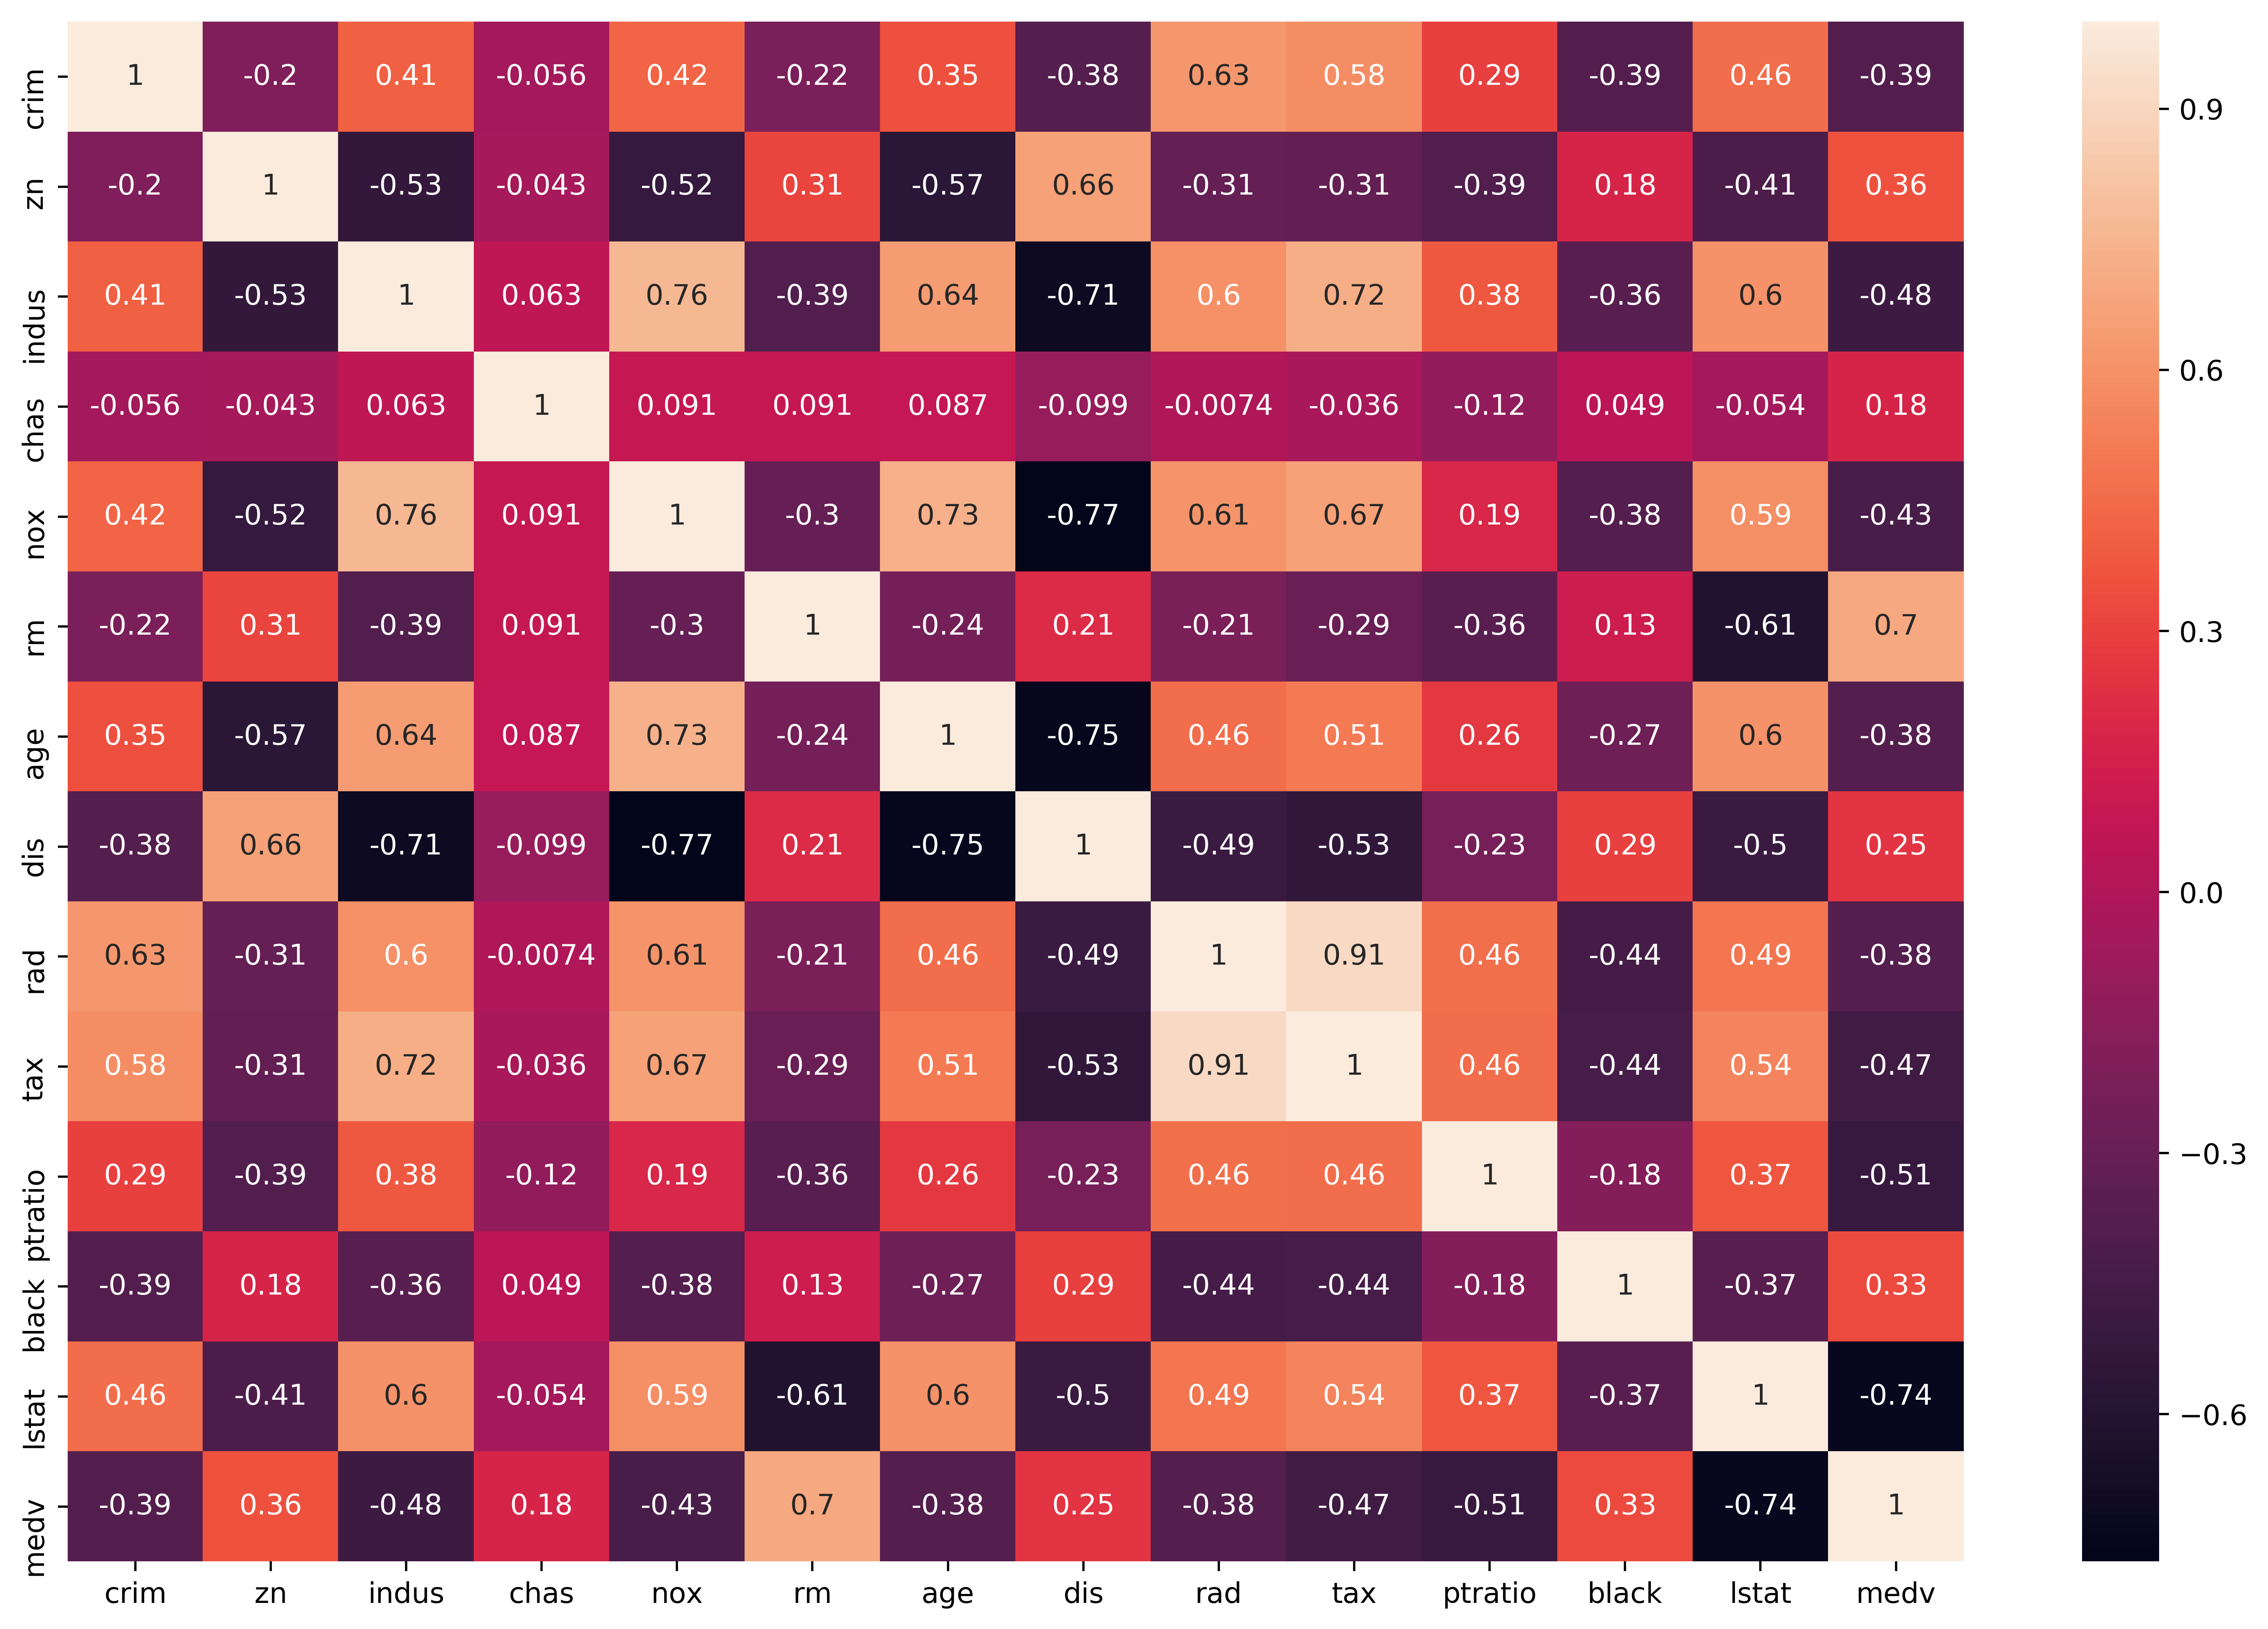

In [10]:
# correlation matrix
fig = plt.subplots(figsize=(15,10),dpi=500)
sns.heatmap(corr,annot=True)

In [13]:
# correlation of 'medv' with other features
df.corrwith(df['medv'])

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
dtype: float64

In [14]:
# 'pstat' 'lstat' 'ptratio' have high correlation 
col= ['medv','rm','lstat','ptratio']

In [15]:
df.corr().filter(col)

,medv,rm,lstat,ptratio
crim,-0.388305,-0.219247,0.455621,0.289946
zn,0.360445,0.311991,-0.412995,-0.391679
indus,-0.483725,-0.391676,0.603800,0.383248
chas,0.175260,0.091251,-0.053929,-0.121515
nox,-0.427321,-0.302188,0.590879,0.188933
rm,0.695360,1.000000,-0.613808,-0.355501
age,-0.376955,-0.240265,0.602339,0.261515
dis,0.249929,0.205246,-0.496996,-0.232471
rad,-0.381626,-0.209847,0.488676,0.464741
tax,-0.468536,-0.292048,0.543993,0.460853


In [16]:
# pivot table
pd.pivot_table(df,index='medv').head()

,age,black,chas,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn
medv,,,,,,,,,,,,,
5.0,100.000000,390.935000,0.0,53.136300,1.457500,18.10,26.785000,0.693000,20.20,24.0,5.5680,666.0,0.0
5.6,100.000000,396.900000,0.0,25.046100,1.588800,18.10,26.770000,0.693000,20.20,24.0,5.9870,666.0,0.0
6.3,77.800000,338.160000,0.0,9.916550,1.500400,18.10,29.970000,0.693000,20.20,24.0,5.8520,666.0,0.0
7.0,99.150000,216.160000,0.0,22.964735,1.706800,22.92,30.475000,0.651000,20.15,14.0,4.9665,688.5,0.0
7.2,99.366667,273.683333,0.0,16.377533,1.611633,18.10,26.726667,0.690667,20.20,24.0,6.0180,666.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7839636c18>,
      dtype=object)

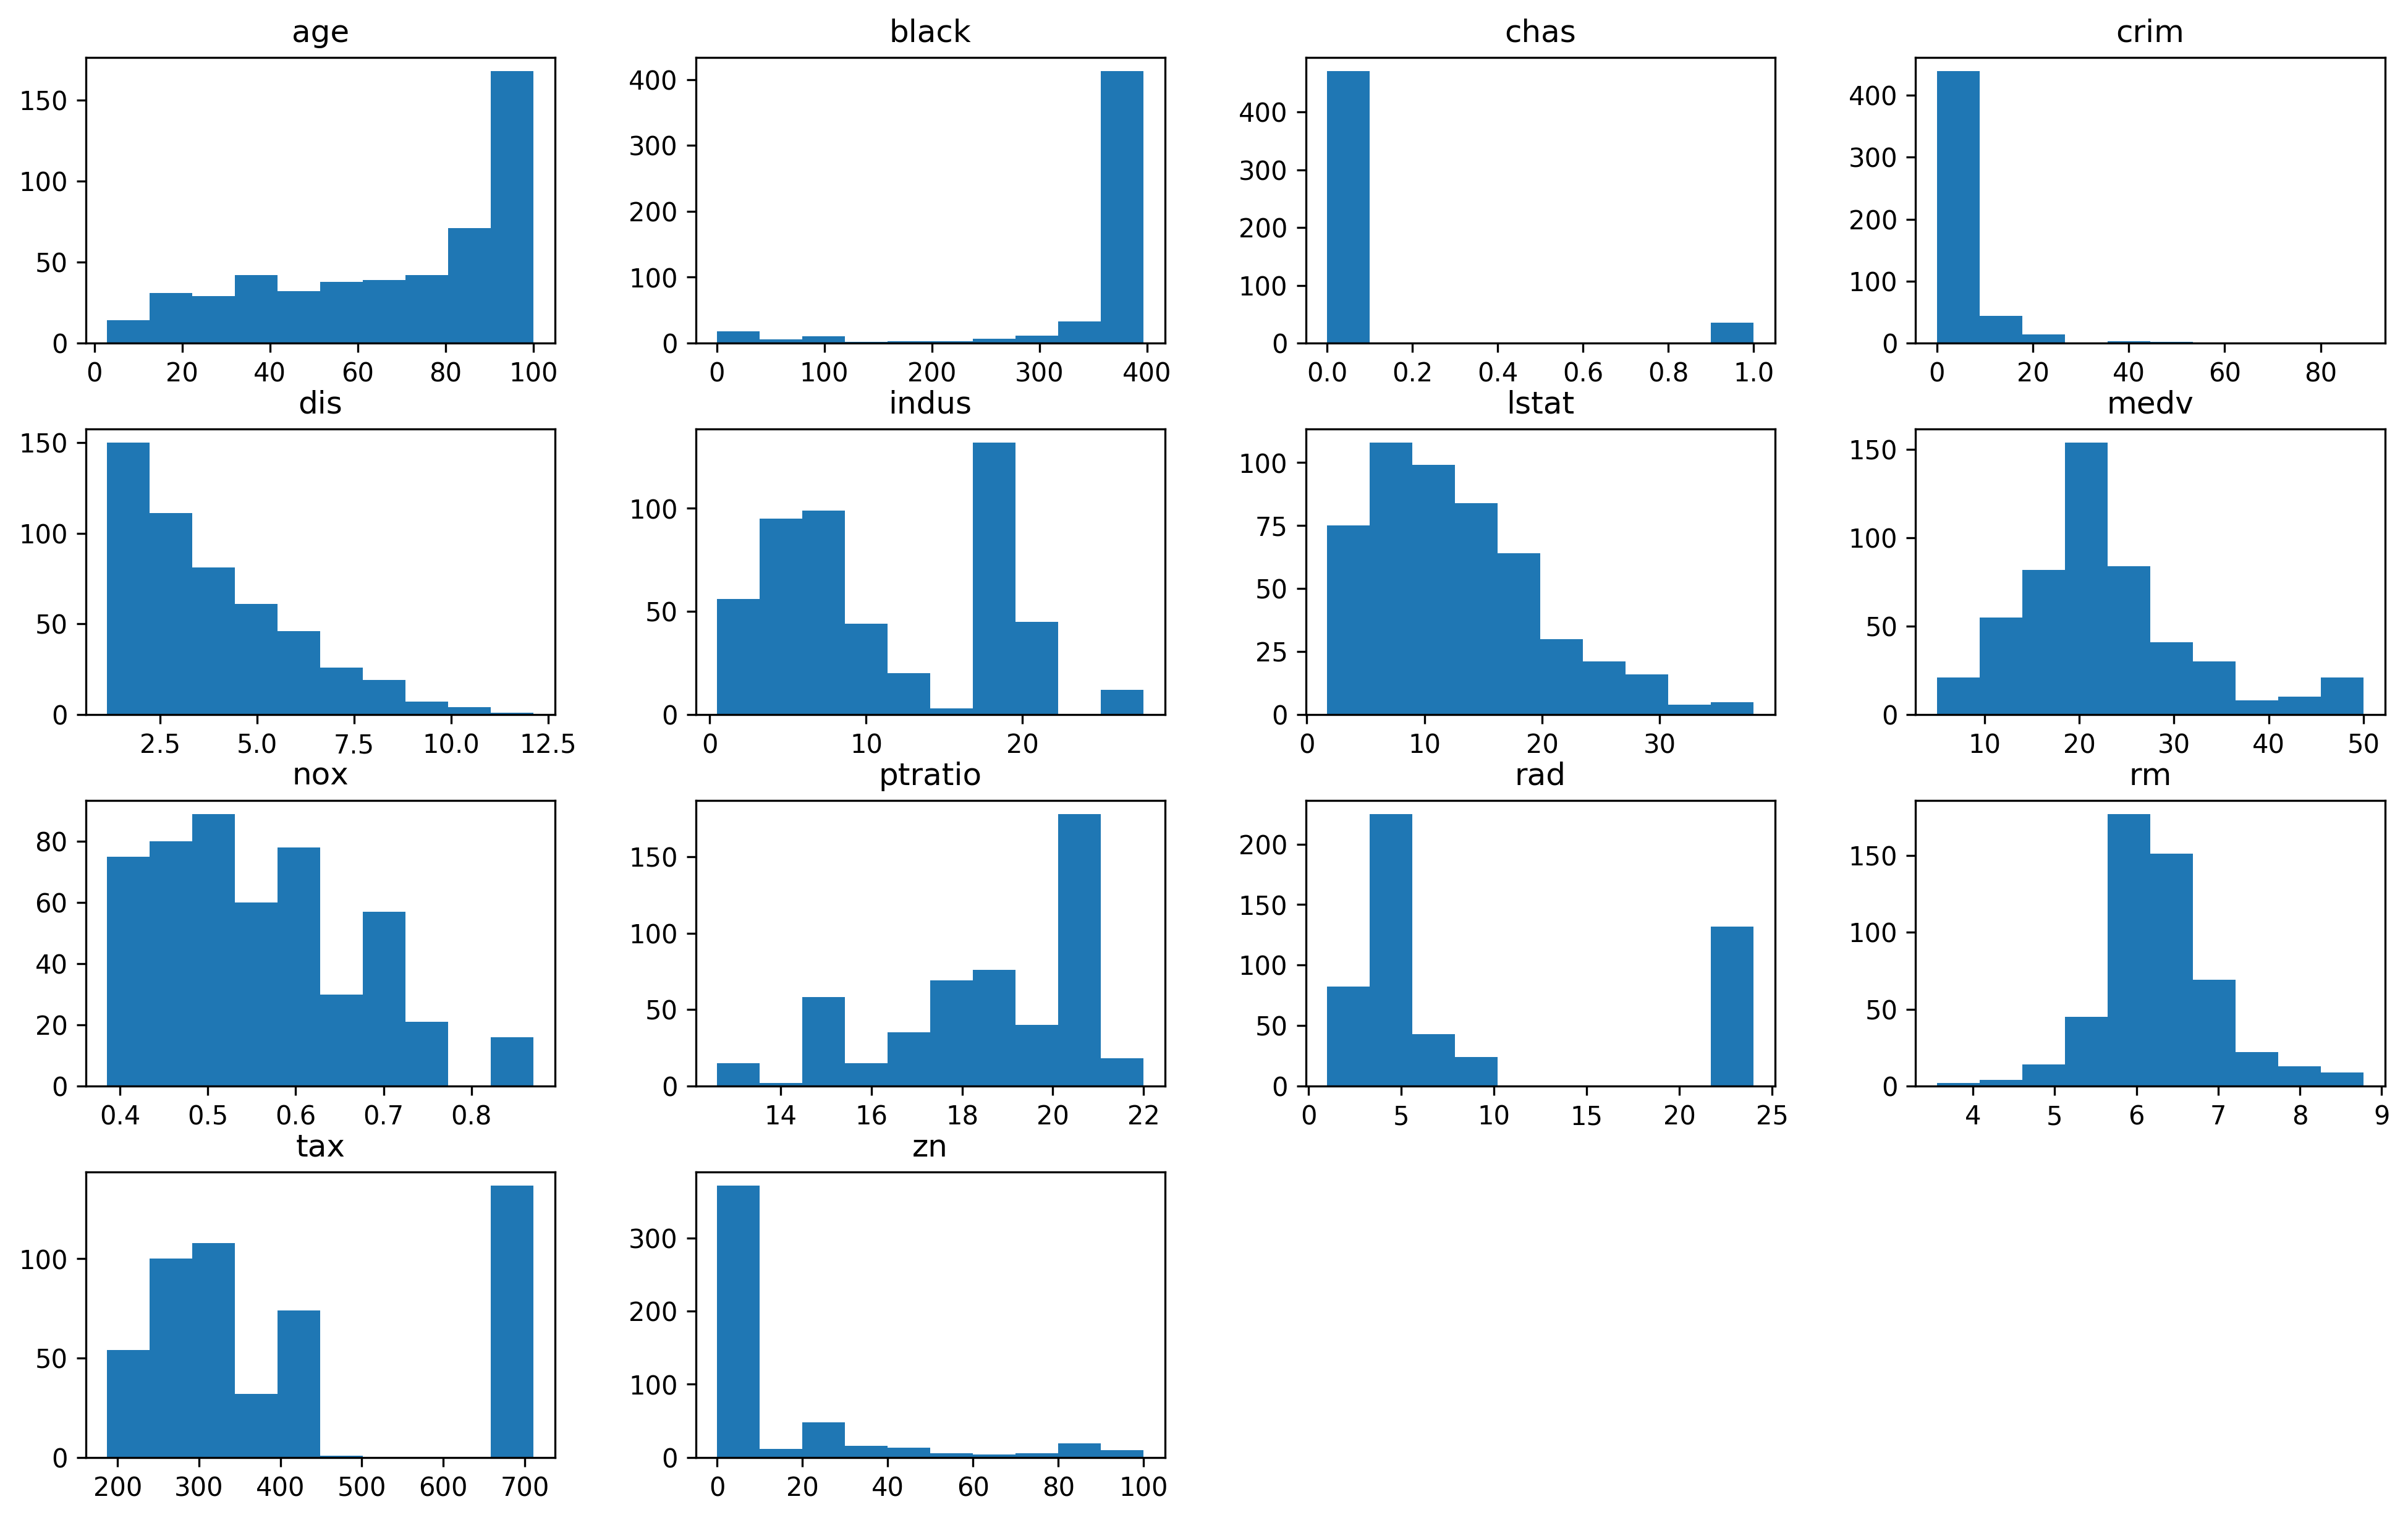

In [17]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams['figure.figsize']= (16,10)
#df.hist(bins=10,grid=False)
df.hist(bins=10,grid=False)

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
df.drop(['black','zn','rad','chas','crim','indus','tax','age'],inplace=True,axis=1)

In [43]:
df.head()

,nox,rm,dis,ptratio,lstat,medv
0,0.538,6.575,4.0900,15.3,4.98,24.0
1,0.469,6.421,4.9671,17.8,9.14,21.6
2,0.469,7.185,4.9671,17.8,4.03,34.7
3,0.458,6.998,6.0622,18.7,2.94,33.4
4,0.458,7.147,6.0622,18.7,5.33,36.2


In [44]:
data= df.values 

In [47]:
x= data[:,0:5]

In [50]:
# Rescaling of x
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

In [51]:
y=data[:,5]

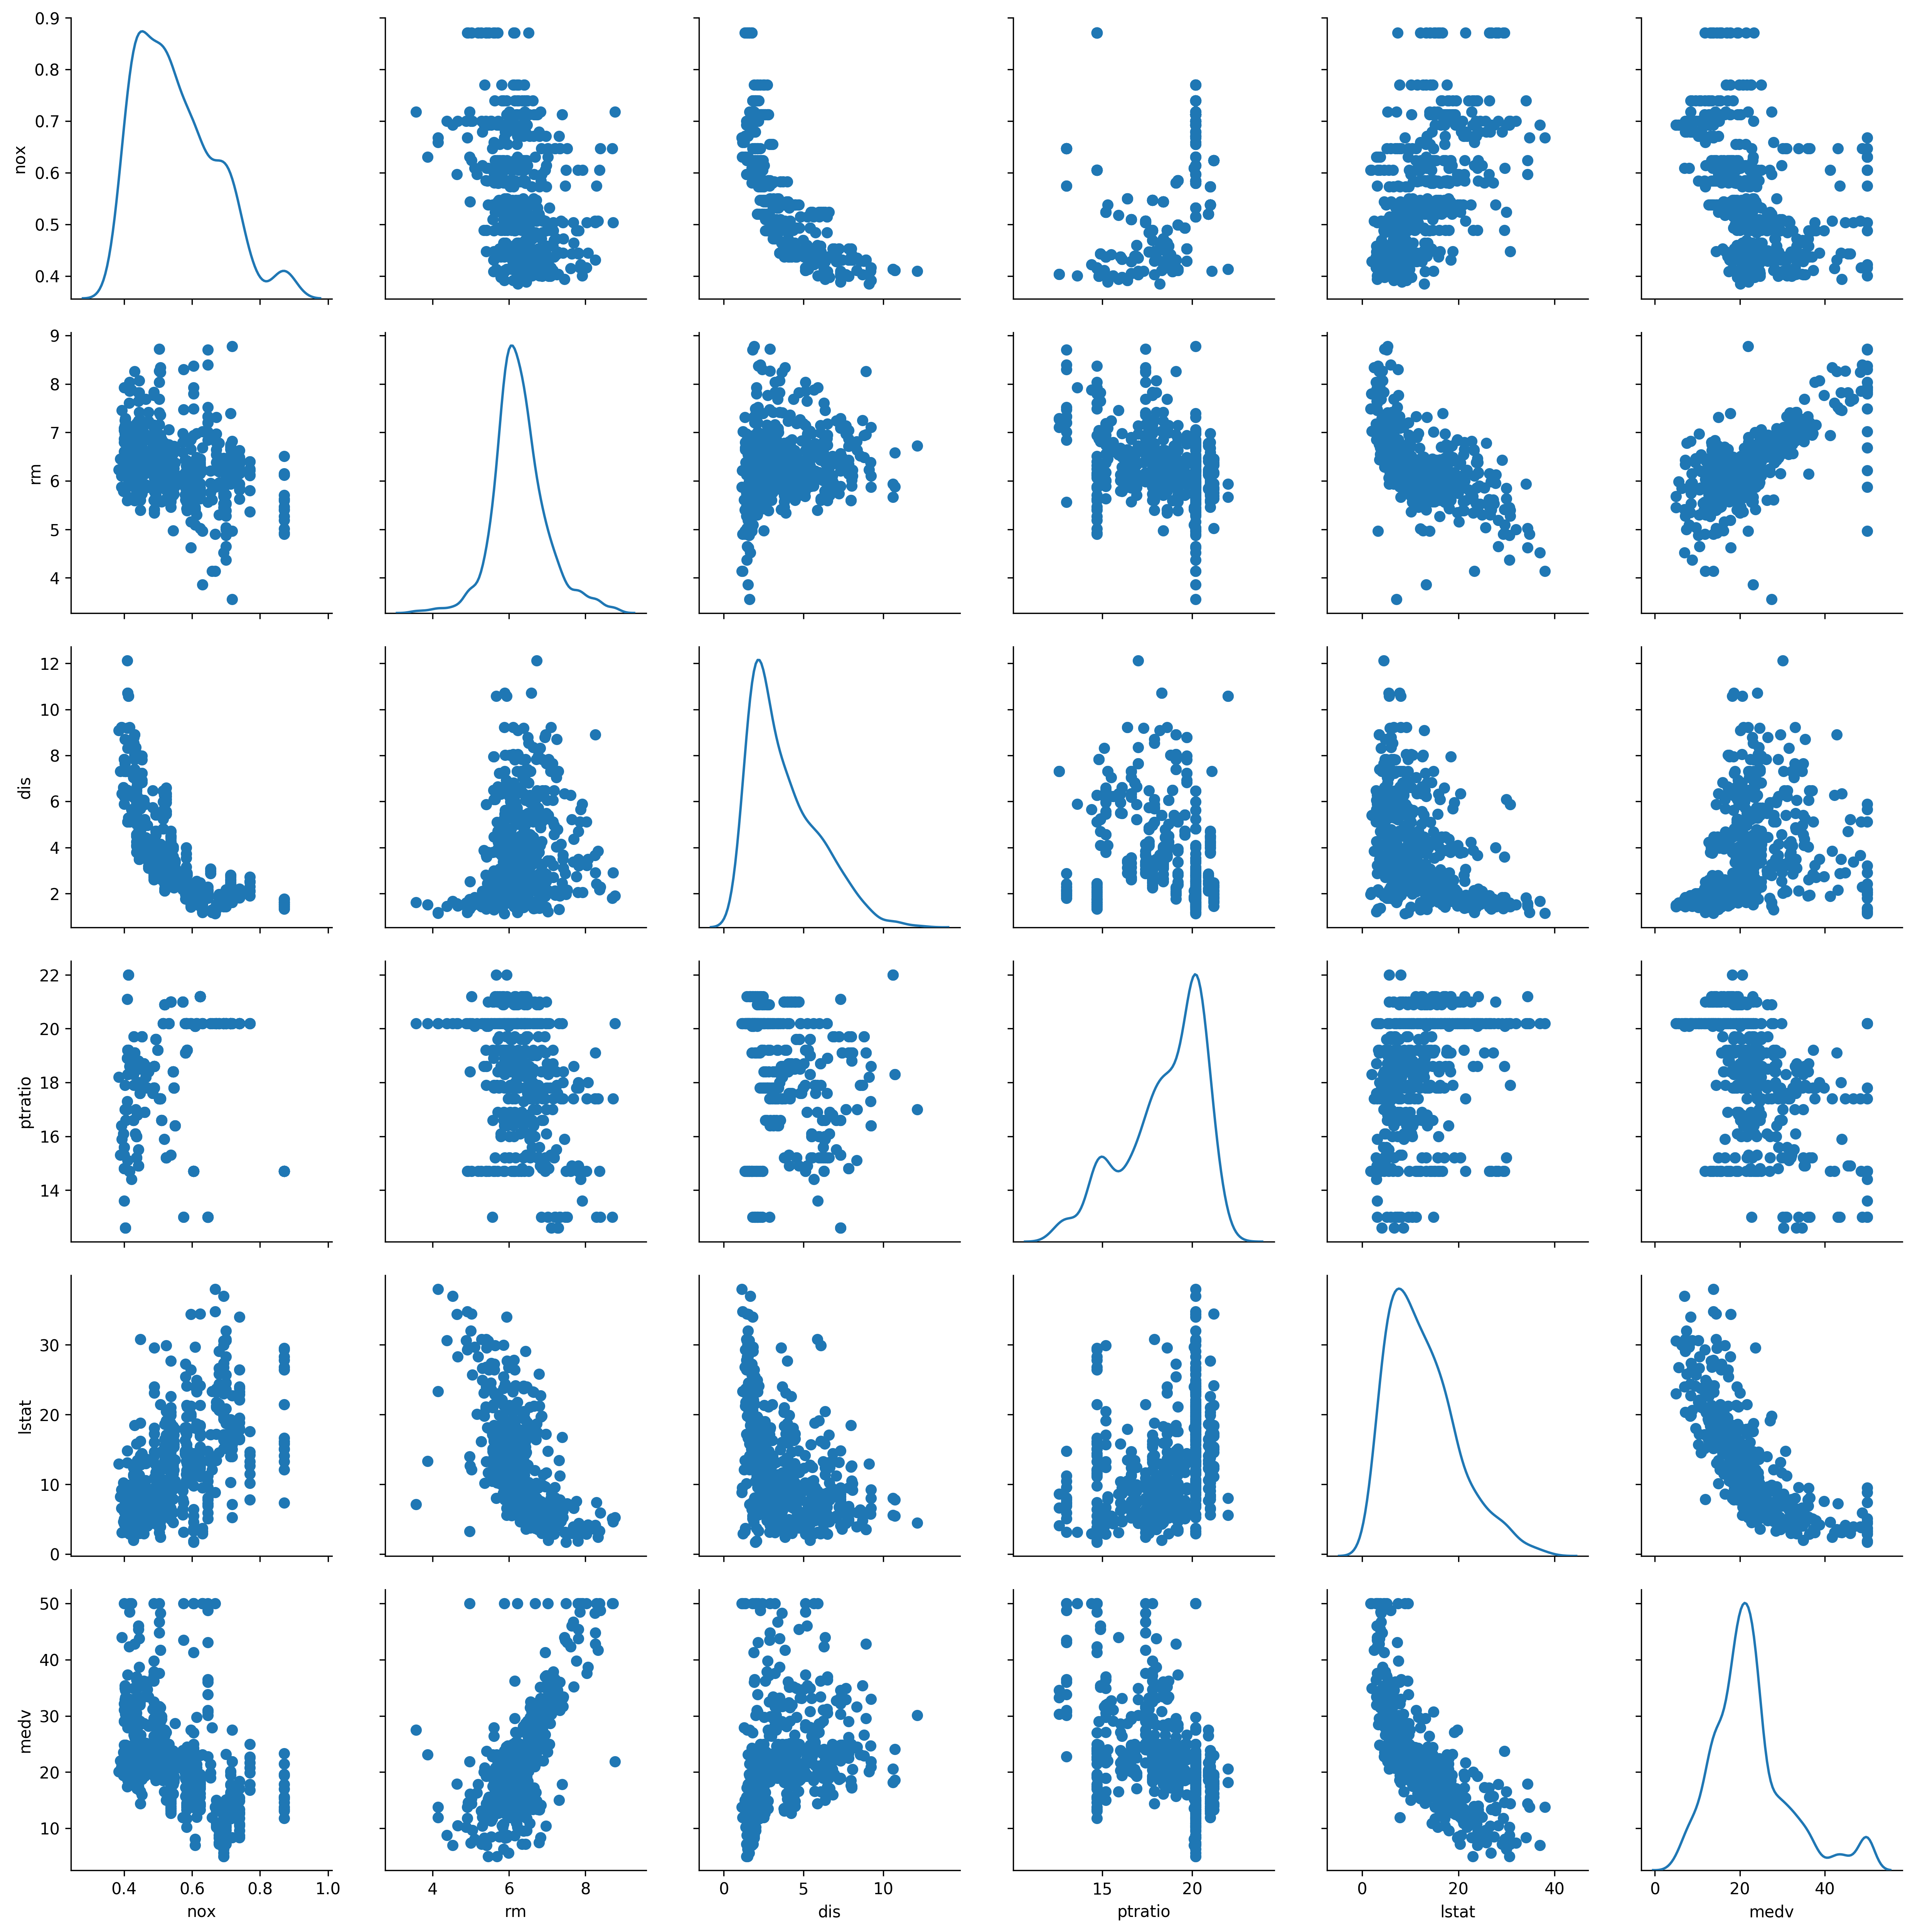

In [52]:
g=sns.pairplot(df,dropna=True,size=2.8,diag_kind='kde')
g.map_offdiag(plt.scatter)

In [53]:
# 'pratio', 'lstat', 'rm' have high correlation with 'medv'
lm = smf.ols(formula= 'medv~rm+ptratio+lstat+nox+dis',data=df)

In [54]:
result= lm.fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 04 Jun 2018   Prob (F-statistic):          3.67e-131
Time:                        16:01:53   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.000      28.436      46.562
rm             4.1633      0.412     10.104      0.000       3.354       4.973
ptratio       -1.0458      0.114     -9.212      0.000      -1.269      -0.823
lstat         -0.5811      0.048    -12.122      0.000      -0.675      -0.487
nox          -17.9966      3.261     -5.519      0.000     -24.403     -11.590
dis           -1.1847      0.168     -7.034      0.000      -1.516      -0.854
==============================================================================
Omnibus:                      187.456   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.498
Skew:                           1.584   Prob(JB):                    5.21e-193
Kurtosis:                       8.654   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3> calculation using GridSearchCV 

In [56]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge

In [57]:
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score

In [58]:
lr = LinearRegression() 

In [59]:
lr_grid = GridSearchCV(lr,param_grid={},verbose=5,cv=5,return_train_score=True,scoring='neg_mean_squared_error')

In [60]:
lr_grid.fit(rescaledX,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ...................... , score=-12.802758377336737, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-22.634735618470994, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-30.45894946938097, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-74.41289014847982, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-24.778117799541583, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=5)

In [61]:
lr_score = lr_grid.cv_results_

In [62]:
lr_score

{'mean_fit_time': array([0.00172577]),
 'std_fit_time': array([0.00076007]),
 'mean_score_time': array([0.00030684]),
 'std_score_time': array([0.00011887]),
 'params': [{}],
 'split0_test_score': array([-12.80275838]),
 'split1_test_score': array([-22.63473562]),
 'split2_test_score': array([-30.45894947]),
 'split3_test_score': array([-74.41289015]),
 'split4_test_score': array([-24.7781178]),
 'mean_test_score': array([-32.97754022]),
 'std_test_score': array([21.46590399]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-27.93762337]),
 'split1_train_score': array([-25.52904493]),
 'split2_train_score': array([-24.79936047]),
 'split3_train_score': array([-15.33524456]),
 'split4_train_score': array([-25.63007675]),
 'mean_train_score': array([-23.84627001]),
 'std_train_score': array([4.38403481])}

In [63]:
lr_grid.best_score_

-32.977540219588064

<h3> Lasso Regression using GridSearchCV

In [64]:
ls = Lasso()

In [65]:
lasso_param = {'alpha' :[0.001,0.01,0.1,1,10]}

In [66]:
ls_grid = GridSearchCV(ls,lasso_param,cv=5, return_train_score=True,verbose=10,scoring='neg_mean_squared_error').fit(rescaledX,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-12.792942168075157, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-22.639435958183398, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=-30.48103549147865, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=-74.40241969888146, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-24.791521606915254, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=-12.701354413116615, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [67]:
ls_score = ls_grid.cv_results_

In [68]:
ls_score

{'mean_fit_time': array([0.00112681, 0.00100789, 0.00113306, 0.00105095, 0.00114107]),
 'std_fit_time': array([2.23833091e-04, 2.46932580e-04, 5.80541358e-05, 7.73583607e-05,
        1.60338577e-04]),
 'mean_score_time': array([0.00030537, 0.00021729, 0.00022073, 0.00032401, 0.00031242]),
 'std_score_time': array([1.31949759e-04, 2.00898461e-05, 2.59862689e-05, 6.37422672e-05,
        3.97413378e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'split0_test_score': array([-12.79294217, -12.70135441, -11.84139942,  -9.37772027,
        -34.56245601]),
 'split1_test_score': array([-22.63943596, -22.68810056, -23.34580624, -28.69557942,
        -96.60660712]),
 'split2_test_score': array([ -30.48103549,  -30.68572106,  -32.86869786,  -58.05112336,
        -160.3822

In [69]:
ls_grid.best_score_

-32.981493655029645

<h3> Using Pipelines in Python

In [70]:
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [71]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [150]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, rescaledX, y, cv=kfold, scoring=RMS)
    #results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -31.916875 (38.389618)
LASSO: -36.695557 (37.232261)
EN: -36.636381 (34.612099)
KNN: -22.763708 (27.432535)
CART: -33.242895 (27.169271)
SVR: -28.464092 (26.678736)


In [73]:
from sklearn.pipeline import Pipeline

In [78]:
param_grid = dict(n_neighbors=np.array(range(1,20)))
model = KNeighborsRegressor()
kfold = KFold(n_splits=11, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -22.101281 using {'n_neighbors': 6}
-29.136028 (26.024139) with: {'n_neighbors': 1}
-26.043345 (28.615136) with: {'n_neighbors': 2}
-24.240325 (26.804765) with: {'n_neighbors': 3}
-23.671168 (27.000989) with: {'n_neighbors': 4}
-22.579719 (26.388242) with: {'n_neighbors': 5}
-22.101281 (27.158696) with: {'n_neighbors': 6}
-22.253175 (27.412463) with: {'n_neighbors': 7}
-22.480607 (27.341400) with: {'n_neighbors': 8}
-23.035364 (28.236232) with: {'n_neighbors': 9}
-23.459299 (28.884624) with: {'n_neighbors': 10}
-23.493437 (28.626164) with: {'n_neighbors': 11}
-23.795409 (29.023731) with: {'n_neighbors': 12}
-23.902587 (28.813945) with: {'n_neighbors': 13}
-23.763227 (28.789862) with: {'n_neighbors': 14}
-23.874960 (28.475481) with: {'n_neighbors': 15}
-23.703286 (28.270456) with: {'n_neighbors': 16}
-23.794370 (28.351647) with: {'n_neighbors': 17}
-23.839017 (28.139770) with: {'n_neighbors': 18}
-24.049442 (28.207214) with: {'n_neighbors': 19}


In [79]:
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, rescaledX, y, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledKNN: -23.559639 (29.143829)
ScaledAB: -26.247736 (26.431710)
ScaledGBM: -21.174164 (27.263165)
ScaledRF: -23.428822 (25.374890)
ScaledET: -21.311401 (24.145979)


In [104]:
param_grid = dict(n_estimators=np.array(range(50,500,50)))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -20.444768 using {'n_estimators': 50}
-20.444768 (26.710964) with: {'n_estimators': 50}
-21.326228 (27.669068) with: {'n_estimators': 100}
-21.930078 (27.624746) with: {'n_estimators': 150}
-22.503468 (28.161129) with: {'n_estimators': 200}
-22.870748 (28.052146) with: {'n_estimators': 250}
-23.065865 (28.020204) with: {'n_estimators': 300}
-23.238340 (28.000689) with: {'n_estimators': 350}
-23.320372 (27.905807) with: {'n_estimators': 400}
-23.478510 (28.022616) with: {'n_estimators': 450}


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [135]:
gbm = GradientBoostingRegressor(n_estimators=400,random_state=0).fit(x,y)

In [136]:
xg = xgb(n_estimator=100,max_depth=10).fit(x,y)

In [137]:
pred_gbm = gbm.predict(x_test)

In [138]:
pred_xg = xg.predict(x_test)

In [139]:
# r2 score for gbm
print(r2_score(y_test,pred_gbm))

0.9907422652535949


In [140]:
# r2 score for xb
print(r2_score(y_test,pred_xg))

0.999486057356866


In [149]:
# Root mean square error
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,pred_gbm)))

0.877980596456056


In [123]:
prediction = xg.predict(x_test)

In [125]:
Submission = pd.DataFrame({'medv' : np.round(prediction,1)})

In [127]:
Submission['ID']= range(1,len(prediction)+1)

In [128]:
Submission.set_index('ID').to_csv('submission.csv')